In [1]:
import scipy
import numpy
import sklearn
import pandas as pds
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

# Dataset clustering using DBSCAN

In [2]:
#df = sns.load_dataset('iris') # load a pandas dataframe from demo file
df = pds.read_csv('./iris_dataset.csv', sep=";") # load a pandas dataframe from csv in current directory
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
classes = df.species
objects = df.drop(['species'],axis=1)

In [4]:
# Perform a clustering with DBSCAN

dbscan = DBSCAN(eps=0.5, min_samples=3)
dbscan.fit(objects)

DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=3, n_jobs=1, p=None)

In [5]:
clusters = dbscan.labels_
print(type(clusters))
print(clusters)

<class 'numpy.ndarray'>
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0
  0  0  1  1  1  1  1  1  1  2  1  1  2  1  1  1  1  1  1  1 -1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  2  1  1
  1  1  2  1  1  1  1  1  1  3 -1  1 -1 -1  1  1  1  1  1  1  1 -1  3  1
  1  1  3  1  1  1  1  1  1  1  1 -1  1  1 -1 -1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1]


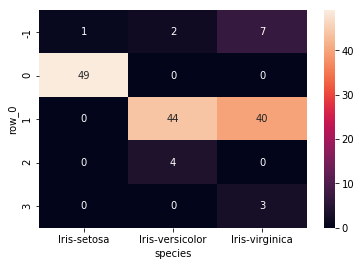

In [6]:
# Contingency table of species vs cluster labels
crosstab = pds.crosstab(clusters,classes)
sns.heatmap(crosstab, annot=True)

# Data Manipulations and cluster views in 2D projections

/Users/crigotti/anaconda/envs/py37/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/crigotti/anaconda/envs/py37/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/crigotti/anaconda/envs/py37/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/Users/crigotti/anaconda/envs/py37/lib/python3.7/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return u

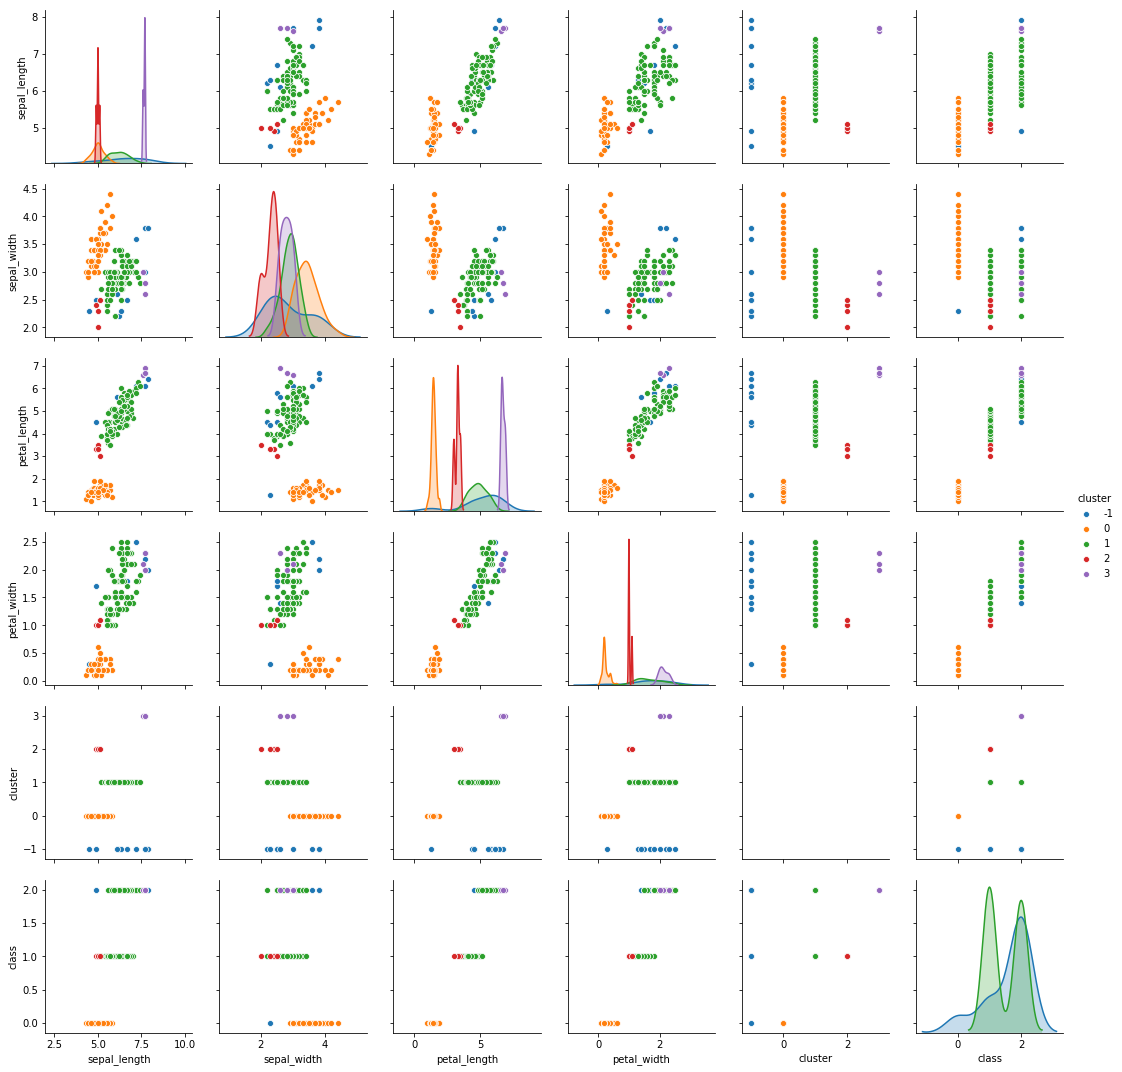

In [7]:
df_all = objects.copy()
df_all['cluster']= clusters
df_all['class']= classes.map({'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2})
sns.pairplot(data=df_all,hue='cluster')

In [8]:
# View the classes in the 2D projections along the other dimensions
#sns.pairplot(data=df_all, vars=df_all.columns[0:5], hue="class")

# Removing noise (removing objects contains in cluster -1)

In [9]:
# get the list of indices of the elements in 'clusters' that are != -1
# using numpy notation
indicesNotNoiseObjects = list(np.argwhere(clusters != -1).flatten())
print(indicesNotNoiseObjects)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 107, 110, 111, 112, 113, 114, 115, 116, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 132, 133, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149]


In [10]:
# get elements in 'clusters' that are != -1 (numpy notation)
clustersNoNoise = clusters[clusters != -1]

print(type(clustersNoNoise))
print(clustersNoNoise.shape)
print(clustersNoNoise)

# get the class of these objects
classesNoNoise = df.loc[:,"species"].iloc[indicesNotNoiseObjects]


<class 'numpy.ndarray'>
(140,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 2 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 2 1 1 1 1 1 1 3 1 1 1 1 1 1 1 1
 3 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


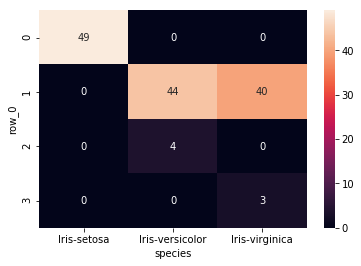

In [11]:
# Contingency table of species vs cluster labels after having removed noise objects
crosstab = pds.crosstab(clustersNoNoise,classesNoNoise)
sns.heatmap(crosstab, annot=True)

In [12]:
# If needed, the objects not in cluster -1 can be obtained by
objectsNoNoise = objects.iloc[indicesNotNoiseObjects]
print(objectsNoNoise.shape)

(140, 4)
